In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv(r"C:\Users\TIBU\Downloads\CodvedaProject\1) iris.csv")
df #display DataFrame

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
X = df[['sepal_length']] 
y = df['petal_length'] 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient: 1.832836834279381
Intercept: -6.919754643134638


In [14]:
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.5965145177566363
R-squared: 0.8179909257095002


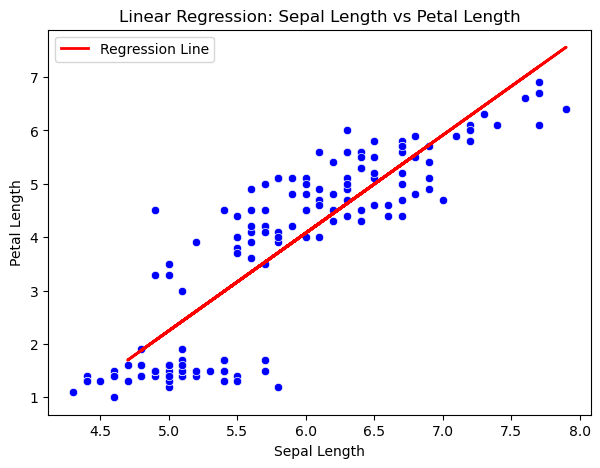

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='sepal_length', y='petal_length', data=df, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Linear Regression: Sepal Length vs Petal Length")
plt.legend()

In [15]:
ts = df['petal_length']

In [16]:
ts.index = pd.RangeIndex(start=1, stop=len(ts)+1)
ts.head()

1    1.4
2    1.4
3    1.3
4    1.5
5    1.4
Name: petal_length, dtype: float64

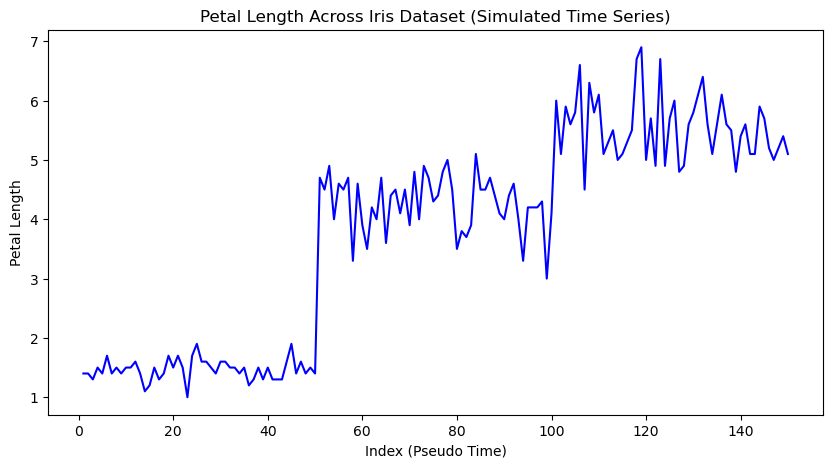

In [17]:
plt.figure(figsize=(10,5))
plt.plot(ts, color='blue')
plt.title("Petal Length Across Iris Dataset (Simulated Time Series)")
plt.xlabel("Index (Pseudo Time)")
plt.ylabel("Petal Length")
plt.show()

In [18]:
moving_avg = ts.rolling(window=5).mean()

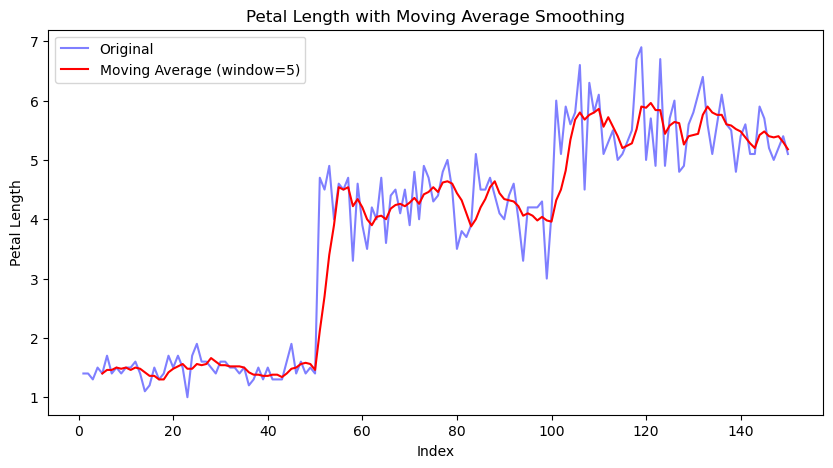

In [19]:
plt.figure(figsize=(10,5))
plt.plot(ts, color='blue', alpha=0.5, label='Original')
plt.plot(moving_avg, color='red', label='Moving Average (window=5)')
plt.title("Petal Length with Moving Average Smoothing")
plt.xlabel("Index")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

In [22]:
decomposition = seasonal_decompose(ts, model='additive', period=10)

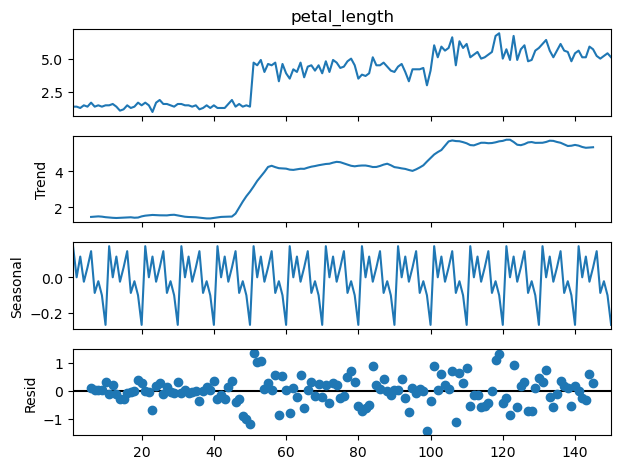

In [23]:
decomposition.plot()
plt.show()

In [25]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
inertia = []

C:\Users\TIBU\anaconda3\python code\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TIBU\anaconda3\python code\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TIBU\anaconda3\python code\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TIBU\anaconda3\python code\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

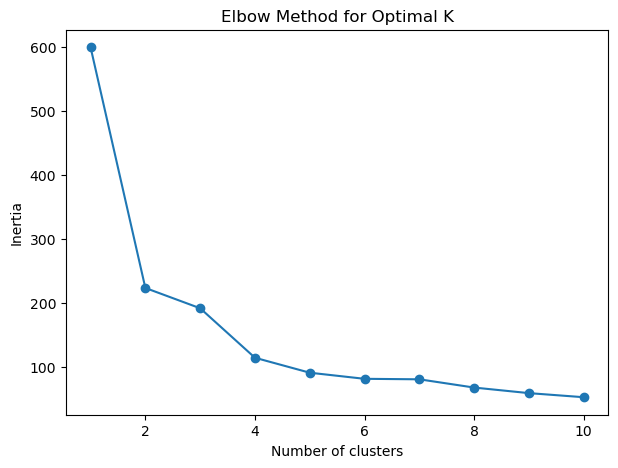

In [31]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = clusters

C:\Users\TIBU\anaconda3\python code\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


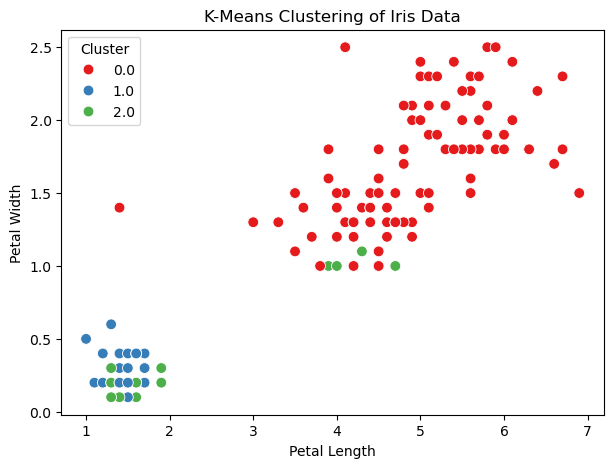

In [33]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='petal_length', y='petal_width', hue='Cluster', 
                palette='Set1', data=df, s=60)
plt.title("K-Means Clustering of Iris Data")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title='Cluster')
plt.show()